# Linear and logistic regression

Linear regreesion is used in prediction for continuos variables while logistic regression is used for multiclass classification problems. Both are essentially, supervised methods.

### Pros:
- Simple to implement, with few hyperparameters
- Good for problems with a strong linear trend
- Many problems can be transformed into a linear problem 
- Computationally cheap

### Cons:

- Assumes little colinearity between variables 
- Assumes the errors on the data follow a normal distribution
- Assumes the variance is independent 
- Sensitive to outliers

### How they work:

Both cases use the gradient at a local point to drive the parameter values towards a local(global) minima that best fits the data.

### Linear regression
In linear regression we are essentially fitting with a straight line, using the L2 norm as the objective funciton for optimization. 

<img src="ml_doc_images/LinearRegression_pred.png" width="300px"/>

<img src="ml_doc_images/Linear_regression_obj.png" width="350px"/>

At each step of the way we update the parameters using the local gradient (gradient descent algorithm), until convergence criteria is satisfied with the following:

<img src="ml_doc_images/LinearRegression_gradient.png" width="390px"/>

### Logistic regression
In logistic regression we follow a similar approach as is done in linear regression, but convert the descrete variables to a continuos space by applying a sigmoid function, such that the predicted values are given by:

<img src="ml_doc_images/LogisticPred.png" width="130px"/>

The objective function for optimization is the cross-entropy function between classes, i.e:

<img src="ml_doc_images/LogisticObj.png" width="410px" />

For the minimization we use gradient descent once again:

<img src=ml_doc_images/Logistic_gradient.png width="200px"\>


# Illustrating the implementation from scratch (numpy)
 
Lets initialize some dummy data assuming we have n=100 (_x_,_y_) measurments:

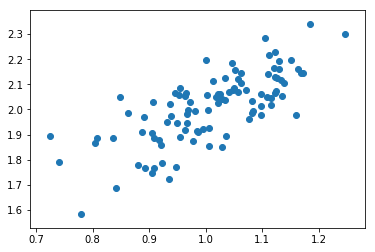

In [170]:
import numpy as np
import matplotlib.pyplot as plot
std_axis = 1
step_size = 0.001
stop_criteria = 0.01
n_features = 1 #only have x,y points
#
X = np.random.normal(1,0.1,size=(100,1))
Y = np.random.normal(1,0.1,size=(100,1))
Y[:,0]+= X[:,0]
plot.scatter(X,Y)

### Lets define some functions used in defining the algorithm and running the minimization

In [180]:
def cost_function(y_pred, X, Y):
    N = len(y_pred)
    return -1./N*np.dot((y_pred-Y).T,X)

def predict_vals(W, X):
    #print(np.dot(W,X.T).shape)
    return np.dot(W,X.T).T

def weight_updated(W,X, Y):
    y_pred = predict_vals(W,X)
    temp = np.dot(y_pred - Y, X.T)
    return -1./len(y_pred)*np.sum(temp)

def fit(X):
    W = np.random.normal(0,0.1,(1,1))
    curr_cost = cost_function(predict_vals(W,X), X,Y)
    ii = 0
    while curr_cost > stop_criteria:
#     for i in range(10):
        W+=step_size*weight_updated(W,X,Y)
        curr_cost = cost_function(predict_vals(W,X), X,Y)
        ii+=1
        if ii%10 == 0:
            print(cost_function(predict_vals(W,X), X,Y))
    print(cost_function(predict_vals(W,X), X,Y))
    return W

[[0.72274164]]
[[0.23890554]]
[[0.07409637]]
[[0.0179574]]
[[0.00995043]]
(1, 1)


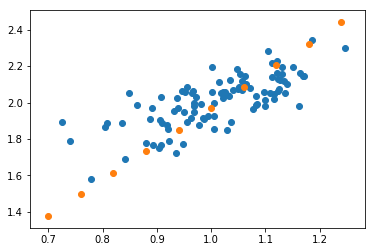

In [183]:
W = fit(X)
print(W.shape)
fun = []
xss = []
for i in range(10):
    x_v = (1.3-0.7)*i/10 + 0.7
    xss.append(x_v)
    fun.append(W*x_v)
    
plot.scatter(X,Y)
plot.scatter(xss,fun)
    
    